In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib 

In [166]:
df = pd.read_csv("farmer.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [167]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [168]:
df["label"].value_counts().shape

(22,)

In [169]:
df.duplicated().sum()

0

In [170]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [171]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [213]:
x = df.drop("label" , axis = 1)

In [214]:
x

,N,P,K,temperature,humidity,ph,rainfall,group,group_15
0,90,42,43,20.879744,82.002744,6.502985,202.935536,8,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,8,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,8,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,8,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,8,8
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,8,13
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,3,13
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,8,13
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,3,13


<Axes: xlabel='temperature', ylabel='Count'>

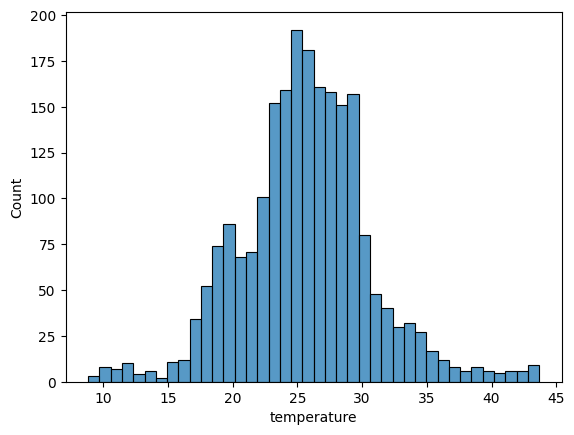

In [215]:
sns.histplot(x["temperature"])

<Axes: xlabel='temperature', ylabel='Density'>

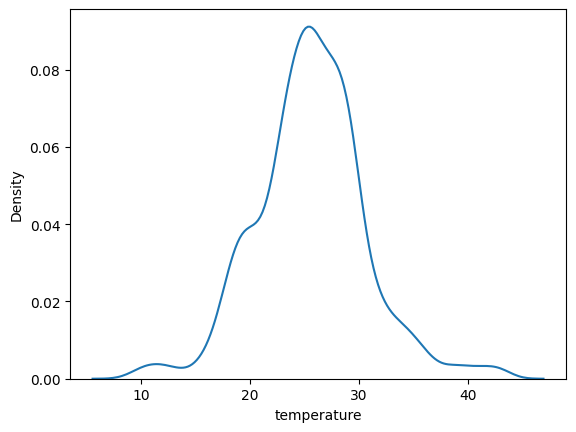

In [216]:
sns.kdeplot( x["temperature"] ) 

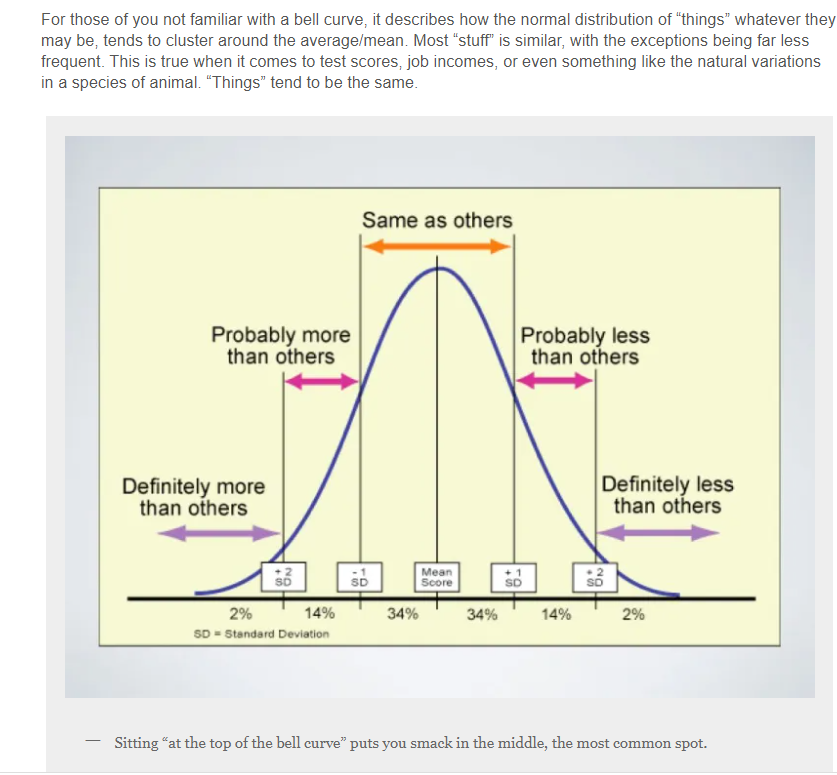

we need to apply normalization technique in our dataset for  k means clustering  
normalisation technique ->   
Xnew = (Xi - Xmean) / standard deviation   

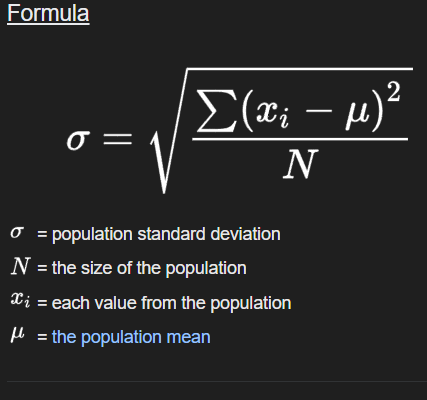

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
std = StandardScaler()

In [178]:
x2 = x.values
x2

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [179]:
x_transformed = std.fit_transform(x2)  # all values are tranformed into normal distibution rnage
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [180]:
x_transformed[0]

array([ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ])

In [181]:
a = pd.DataFrame(x_transformed)   
a

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [182]:
a[0].mean()

-1.0335167065601457e-16

In [183]:
format(a[0].mean() , ".20f")  # extremely close to zero

'-0.00000000000000010335'

In [184]:
format(a[1].std() , ".20f") # almost equals to one 

'1.00022735023597131310'

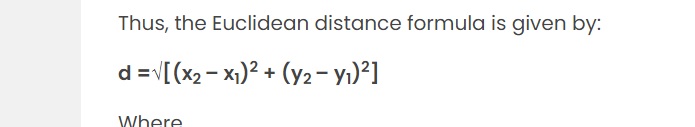

In [185]:
from sklearn.cluster import KMeans

In [186]:
km = KMeans(n_clusters=10)

In [187]:
km.fit(x_transformed)

KMeans(n_clusters=10)

In [188]:
km.labels_

array([8, 8, 8, ..., 8, 3, 8])

In [189]:
df["group"] = km.labels_
df

,N,P,K,temperature,humidity,ph,rainfall,label,group
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,8
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,3
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,8
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,3


In [190]:
df.iloc[:25, :]

,N,P,K,temperature,humidity,ph,rainfall,label,group
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,8
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,8
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,8
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,8
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,8


In [191]:
df["group"].value_counts()

group
3    339
8    294
9    282
6    262
5    206
2    200
4    200
1    171
0    144
7    102
Name: count, dtype: int64

In [192]:
senventh_group = df[df["group"] == 7]
senventh_group

,N,P,K,temperature,humidity,ph,rainfall,label,group
200,40,72,77,17.024985,16.988612,7.485996,88.551231,chickpea,7
201,23,72,84,19.020613,17.131591,6.920251,79.926981,chickpea,7
202,39,58,85,17.887765,15.405897,5.996932,68.549329,chickpea,7
203,22,72,85,18.868056,15.658092,6.391174,88.510490,chickpea,7
204,36,67,77,18.369526,19.563810,7.152811,79.263577,chickpea,7
...,...,...,...,...,...,...,...,...,...
297,36,56,83,18.897802,19.761829,7.452671,69.095125,chickpea,7
298,40,58,75,18.591908,14.779596,7.168096,89.609825,chickpea,7
299,49,69,82,18.315615,15.361435,7.263119,81.787105,chickpea,7
438,14,74,19,18.397591,36.826393,6.624966,93.123306,pigeonpeas,7


In [193]:
senventh_group["label"].value_counts()

label
chickpea      100
pigeonpeas      2
Name: count, dtype: int64

In [194]:
fourth_group = df[df["group"] == 4]
fourth_group["label"].value_counts()

label
watermelon    100
muskmelon     100
Name: count, dtype: int64

In [195]:
df[(df["group"] == 7) & (df["label"] == "rice")]

,N,P,K,temperature,humidity,ph,rainfall,label,group


In [196]:
wcss = []
for i in range(5 , 50):
    km = KMeans(n_clusters=i)
    km.fit_transform(x_transformed)
    wcss.append(km.inertia_)

In [197]:
cluster = list(range(5,50))
cluster


[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

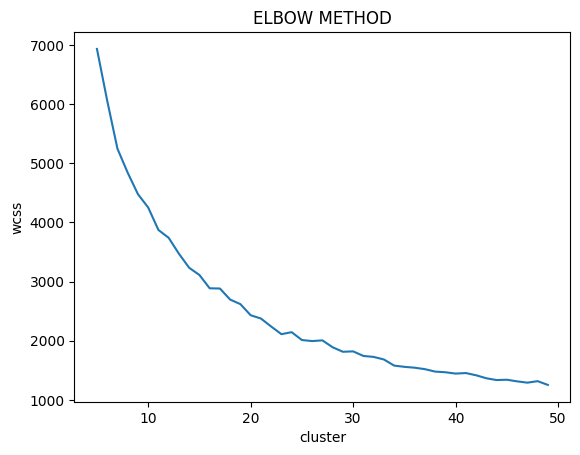

In [198]:
sns.lineplot(x=cluster , y = wcss)
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title("ELBOW METHOD")
plt.show()

wcss must be as low as possible     
if wcss is low which means size of cluster is small and in this case most of the points will be close to centroid   
more the  points nearer to centroid the more they are suitable for that cluster  

In [199]:
km = KMeans(n_clusters=15)

In [200]:
km.fit(x_transformed)

KMeans(n_clusters=15)

In [201]:
km.labels_

array([ 8,  8,  8, ..., 13, 13, 13])

In [202]:
df["group_15"] = km.labels_

In [203]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,group,group_15
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,8,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,8,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,8,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8,8
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,8,13
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,3,13
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,8,13
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,3,13


In [204]:
df["group_15"].value_counts()

group_15
1     398
5     202
11    200
9     184
8     159
10    159
2     158
6     140
14    133
3     104
13    103
7      95
0      62
12     62
4      41
Name: count, dtype: int64

In [205]:
def find_label(i):
    a= df[df["group_15"] == i]
    print(list(  a["label"].value_counts().keys() ))

x = int(input("enter group no."))
find_label(x)


['mungbean', 'blackgram', 'lentil', 'mothbeans', 'papaya', 'pigeonpeas', 'mango', 'orange']


In [206]:
joblib.dump(km , "kmeans_model.lb")

['kmeans_model.lb']

In [207]:
joblib.dump(std , "StandardScaler.lb")

['StandardScaler.lb']

In [208]:
x_transformed[0]

array([ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ])

In [209]:
km.predict([[ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ]])

array([8])

In [210]:
df[(df["group_15"] == 11)]["label"].value_counts()

label
watermelon    100
muskmelon     100
Name: count, dtype: int64

In [211]:
df.to_csv("data_to_be_filtered.csv" , index = False)